## 所需要的package
**json**<br/>
Python Json library. 用来对于Json格式的处理<br/><br/>

**requests**<br/>
Python HTTP library. 用来做API调用<br/><br/>
**pandas**<br/>
Python data analysis library<br/><br/>
**matplotlib**<br/>
Python plotting library

In [30]:
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

## Load JSON from file
Python has an in-built package called json that can help us handle JSON easily. But
before we use any functions from json package we’ll have to import the package into
our project. This can be done easily by calling import json at the beginning of
weather_forecast.py .

In [145]:
def load_json_sample(path):
    with open(path, encoding='utf-8') as json_file:
        return json.load(json_file)

In [146]:
def daily_data_of_attributes(json_dict, attributes):
    daily_attributes = {}
    for attr in attributes:
        daily_attributes[attr] = []
    daily_data = json_dict["daily"]["data"]
    try:
        for dict_data in daily_data:
            for attr in attributes:
                daily_attributes[attr].append(dict_data[attr])
    except KeyError:
        print("Key Not Found")
        return {}
    return daily_attributes

In [147]:
def request_data():
    # LA 37.8267,-122.4233 , beijing 39.904200, 116.407396
    lat = 37.8267
    long = -122.4233
    api_key = "62bf94de3c232f30f6f3ee5bb534c2f3"
    url = "https://api.darksky.net/forecast/%s/%s,%s?units=si" % (api_key, lat, long)
    response = requests.get(url)
    return json.loads(response.text)

In [148]:
def get_daily_data(remote=False):
    if remote:
        json_obj = request_data()
    else:
        json_obj = load_json_sample('sample.json')
    print(json_obj)
    attributes = ['temperatureMin', 'temperatureMax', 'humidity']
    daily_data = daily_data_of_attributes(json_obj, attributes)
    return daily_data

In [150]:
def pretty_print_dict_of_list(d):
    indent = 4
    print("{")
    for k, l in d.items():
        print(indent * " " + k + ": ", end="")
        print(l)
    print("}")

In [151]:
print(daily_data)

{'temperatureMin': [13.46, 13.63, 14.64, 11.42, 9.4, 11.57, 11.33, 9.96], 'temperatureMax': [18.73, 20.6, 17.25, 15.86, 15.94, 17.67, 18.09, 17.81], 'humidity': [0.83, 0.69, 0.86, 0.75, 0.68, 0.47, 0.45, 0.63]}


In [153]:
daily_data = get_daily_data(True)

{'latitude': 37.8267, 'longitude': -122.4233, 'timezone': 'America/Los_Angeles', 'currently': {'time': 1511542210, 'summary': 'Partly Cloudy', 'icon': 'partly-cloudy-day', 'nearestStormDistance': 6, 'nearestStormBearing': 112, 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 13.69, 'apparentTemperature': 13.69, 'dewPoint': 12.47, 'humidity': 0.92, 'pressure': 1020.14, 'windSpeed': 0.12, 'windGust': 1.04, 'windBearing': 308, 'cloudCover': 0.46, 'uvIndex': 1, 'visibility': 12.71, 'ozone': 240.63}, 'minutely': {'summary': 'Partly cloudy for the hour.', 'icon': 'partly-cloudy-day', 'data': [{'time': 1511542200, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1511542260, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1511542320, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1511542380, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1511542440, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1511542500, 'precipIntensity': 0, 'precipProb

In [154]:
pretty_print_dict_of_list(daily_data)

{
    temperatureMin: [13.02, 13.45, 14.46, 11.42, 9.4, 11.57, 11.33, 9.96]
    temperatureMax: [19.14, 20.57, 16.83, 15.69, 15.94, 17.67, 18.09, 17.81]
    humidity: [0.83, 0.68, 0.85, 0.76, 0.68, 0.47, 0.45, 0.63]
}


In [155]:
df = pd.DataFrame(daily_data)

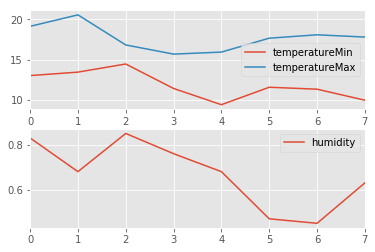

In [156]:
df_temperature = df[["temperatureMin", "temperatureMax"]]
df_humidity = df[["humidity"]]
# Plot data
plt.style.use('ggplot')
_, axes = plt.subplots(nrows=2)
df_temperature.plot(ax=axes[0])
df_humidity.plot(ax=axes[1])
plt.show()

In [157]:
import subprocess

In [158]:
def say(text: str):
    subprocess.call('say ' + text, shell=True)

In [161]:
say("负0.55")

In [163]:
highest_temp = max(daily_data["temperatureMax"])
lowest_temp = min(daily_data["temperatureMin"])
report = "下周最高温度 The highest temperature in the coming week will be " \
    + str(highest_temp) + " 度degrees, 最低温度 with the lowest of " + str(lowest_temp) + "度 degrees."
say(report)